In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 

In [3]:
img=image.load_img("/content/drive/MyDrive/Data/Testing/Not Happy/IMG_20210521_141102.jpg")

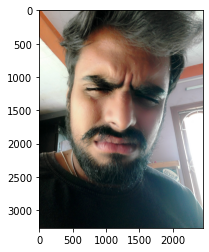

In [6]:
plt.imshow(img)

In [11]:
cv2.imread("/content/drive/MyDrive/Data/Testing/Not Happy/IMG_20210521_141102.jpg")

array([[[ 26,  80, 175],
        [ 28,  82, 177],
        [ 30,  84, 178],
        ...,
        [232, 243, 240],
        [233, 245, 239],
        [232, 244, 238]],

       [[ 42,  96, 191],
        [ 33,  87, 181],
        [ 32,  86, 180],
        ...,
        [229, 240, 237],
        [229, 241, 235],
        [227, 239, 233]],

       [[ 45,  99, 193],
        [ 46, 101, 192],
        [ 44,  99, 190],
        ...,
        [231, 240, 237],
        [229, 238, 235],
        [233, 242, 239]],

       ...,

       [[  9,  11,  11],
        [ 13,  15,  15],
        [ 16,  16,  16],
        ...,
        [136, 127,  94],
        [134, 124,  94],
        [135, 125,  95]],

       [[ 14,  15,  13],
        [ 14,  15,  13],
        [ 15,  15,  15],
        ...,
        [128, 121,  88],
        [129, 121,  91],
        [131, 123,  93]],

       [[ 14,  15,  13],
        [ 14,  15,  13],
        [ 15,  15,  15],
        ...,
        [130, 124,  89],
        [128, 120,  90],
        [128, 120,  90]]

In [10]:
#read the path of the following directory
train_path="/content/drive/MyDrive/Data/Traning"
test_path="/content/drive/MyDrive/Data/Testing"
validation_path="/content/drive/MyDrive/Data/Validation"

In [12]:
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0)


In [14]:
train_dataset=train.flow_from_directory(train_path,
                                        batch_size=2,
                                        target_size=(200,200),
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(validation_path,
                                                  batch_size=2,
                                                  target_size=(200,200),
                                                  class_mode='binary')

Found 16 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [15]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#Build the Model

In [17]:
from tensorflow.keras import models,layers

In [27]:
cnn=models.Sequential([
      layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(200,200,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=240,kernel_size=(3,3),activation="relu"),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(60,activation="relu"),
      layers.Dense(1,activation="sigmoid")
])

In [28]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 240)      

In [29]:
cnn.compile(loss="binary_crossentropy",
            optimizer="adam",metrics=["accuracy"])

In [33]:
  #fit the model
model_history=cnn.fit(train_dataset,epochs=12,
                      validation_data=validation_dataset)

Epoch 1/12
8/8 [==============================] - 3s 458ms/step - loss: 2.5536e-06 - accuracy: 1.0000 - val_loss: 3.6111 - val_accuracy: 0.7333
Epoch 2/12
8/8 [==============================] - 3s 441ms/step - loss: 2.4325e-06 - accuracy: 1.0000 - val_loss: 3.6249 - val_accuracy: 0.7333
Epoch 3/12
8/8 [==============================] - 3s 437ms/step - loss: 2.3738e-06 - accuracy: 1.0000 - val_loss: 3.6239 - val_accuracy: 0.7333
Epoch 4/12
8/8 [==============================] - 3s 439ms/step - loss: 2.2598e-06 - accuracy: 1.0000 - val_loss: 3.6418 - val_accuracy: 0.7333
Epoch 5/12
8/8 [==============================] - 3s 441ms/step - loss: 2.1676e-06 - accuracy: 1.0000 - val_loss: 3.6540 - val_accuracy: 0.7333
Epoch 6/12
8/8 [==============================] - 3s 431ms/step - loss: 2.0913e-06 - accuracy: 1.0000 - val_loss: 3.6646 - val_accuracy: 0.7333
Epoch 7/12
8/8 [==============================] - 3s 437ms/step - loss: 2.0404e-06 - accuracy: 1.0000 - val_loss: 3.6827 - val_accuracy:

In [44]:
train_dataset